In [64]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import plotly.express as px
import plotly.graph_objects as go
import pandas as pd
from sklearn import datasets, linear_model
from sklearn.model_selection import train_test_split
from matplotlib import pyplot as plt
from kmodes.kmodes import KModes
import seaborn as sns
from scipy import stats
from sklearn.linear_model import LinearRegression

In [216]:
#pip install kmodes

In [217]:
#pip install --upgrade kmodes

In [65]:
df = pd.read_csv("shootings.csv", sep=",", header=None, engine='python', encoding="utf-8-sig") # imports the dataset

In [66]:
header = df.iloc[0]
# take the rest of your data minus the header row
df = df[1:]
# set the header row as the df header
df.columns = header
df

,id,name,date,manner_of_death,armed,age,gender,race,city,state,signs_of_mental_illness,threat_level,flee,body_camera,arms_category
1,3,Tim Elliot,2015-01-02,shot,gun,53.0,M,Asian,Shelton,WA,True,attack,Not fleeing,False,Guns
2,4,Lewis Lee Lembke,2015-01-02,shot,gun,47.0,M,White,Aloha,OR,False,attack,Not fleeing,False,Guns
3,5,John Paul Quintero,2015-01-03,shot and Tasered,unarmed,23.0,M,Hispanic,Wichita,KS,False,other,Not fleeing,False,Unarmed
4,8,Matthew Hoffman,2015-01-04,shot,toy weapon,32.0,M,White,San Francisco,CA,True,attack,Not fleeing,False,Other unusual objects
5,9,Michael Rodriguez,2015-01-04,shot,nail gun,39.0,M,Hispanic,Evans,CO,False,attack,Not fleeing,False,Piercing objects
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4891,5916,Rayshard Brooks,2020-06-12,shot,Taser,27.0,M,Black,Atlanta,GA,False,attack,Foot,True,Electrical devices
4892,5925,Caine Van Pelt,2020-06-12,shot,gun,23.0,M,Black,Crown Point,IN,False,attack,Car,False,Guns
4893,5918,Hannah Fizer,2020-06-13,shot,unarmed,25.0,F,White,Sedalia,MO,False,other,Not fleeing,False,Unarmed
4894,5921,William Slyter,2020-06-13,shot,gun,22.0,M,White,Kansas City,MO,False,other,Other,False,Guns


In [6]:
# Clustering Model  (good model)

In [4]:
# categorical data
data = df
#data = df[["armed","race", "manner_of_death", "age" ,"body_camera", "gender", "signs_of_mental_illness"]]

# model
km = KModes(n_clusters=5, init='Huang', n_init=5, verbose=1)
clusters = km.fit_predict(data)

# Print the results of clustering centroids
print(km.cluster_centroids_)

Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 1, iteration: 1/100, moves: 378, cost: 38396.0
Run 1, iteration: 2/100, moves: 1, cost: 38396.0
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 2, iteration: 1/100, moves: 292, cost: 38782.0
Run 2, iteration: 2/100, moves: 6, cost: 38781.0
Run 2, iteration: 3/100, moves: 0, cost: 38781.0
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 3, iteration: 1/100, moves: 1423, cost: 38328.0
Run 3, iteration: 2/100, moves: 8, cost: 38328.0
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 4, iteration: 1/100, moves: 535, cost: 36930.0
Run 4, iteration: 2/100, moves: 0, cost: 36930.0
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 5, iteration: 1/100, moves: 1108, cost: 37298.0
Run 5, iteration: 2/100, moves: 2, cost: 37298.0
Best run was number 4
[['1000' 'TK TK' '2018-02-2

In [5]:
# Prediction Model

In [6]:
df2 = pd.read_csv("shootings_1.csv", sep=",", header=None, engine='python', encoding="utf-8-sig") # imports the dataset

In [7]:
header = df2.iloc[0]
# take the rest of your data minus the header row
df2 = df2[1:]
# set the header row as the df header
df2.columns = header
df2

,id,name,date,manner_of_death,armed,age,gender,race,city,state,signs_of_mental_illness,threat_level,flee,body_camera,arms_category
1,4635,Henry Lane,4/14/2019,1,14,42,0,5,Red Bluff,CA,0,other,Foot,1,Blunt instruments
2,627,Neil White,7/9/2015,1,17,38,0,1,Los Angeles,CA,1,attack,Other,1,Electrical devices
3,1004,John David Livingston,11/15/2015,1,17,32,0,1,Spring Lake,NC,1,attack,Not fleeing,1,Electrical devices
4,1365,Marco Loud,3/12/2016,1,17,20,0,2,Houston,TX,1,attack,Not fleeing,1,Electrical devices
5,2530,Selwyn Aubrey Hall,4/26/2017,1,17,57,0,2,Jacksonville,FL,1,other,Not fleeing,1,Electrical devices
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4891,5913,Gregorio Cruz Vanloo,6/11/2020,0,0,28,0,1,DeKalb County,TN,1,other,Other,1,Guns
4892,5914,Mason James Lira,6/11/2020,0,0,26,0,1,Paso Robles,CA,0,attack,Foot,1,Guns
4893,5925,Caine Van Pelt,6/12/2020,0,0,23,0,2,Crown Point,IN,1,attack,Car,1,Guns
4894,5921,William Slyter,6/13/2020,0,0,22,0,1,Kansas City,MO,1,other,Other,1,Guns


In [8]:
df2.dtypes

0
id                         object
name                       object
date                       object
manner_of_death            object
armed                      object
age                        object
gender                     object
race                       object
city                       object
state                      object
signs_of_mental_illness    object
threat_level               object
flee                       object
body_camera                object
arms_category              object
dtype: object

In [9]:
# changes all the ability variables to a numeric type from an object type. 
df2['manner_of_death'] = pd.to_numeric(df2['manner_of_death'], errors='coerce')
df2['armed'] = pd.to_numeric(df2['armed'], errors='coerce')
df2['age'] = pd.to_numeric(df2['age'], errors='coerce')
df2['gender'] = pd.to_numeric(df2['gender'], errors='coerce')
df2['race'] = pd.to_numeric(df2['race'], errors='coerce')
df2['signs_of_mental_illness'] = pd.to_numeric(df2['signs_of_mental_illness'], errors='coerce')
df2['body_camera'] = pd.to_numeric(df2['body_camera'], errors='coerce')

In [10]:
df2.dtypes

0
id                          object
name                        object
date                        object
manner_of_death              int64
armed                        int64
age                        float64
gender                       int64
race                         int64
city                        object
state                       object
signs_of_mental_illness      int64
threat_level                object
flee                        object
body_camera                  int64
arms_category               object
dtype: object

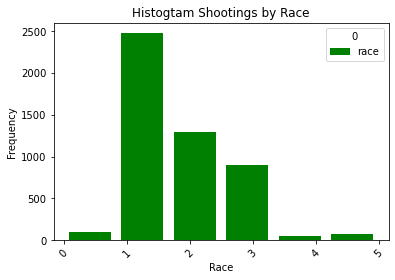

In [11]:
df2[['race']].plot(kind='hist',bins=6,rwidth=.8, color='green')
plt.ylabel('Frequency')
plt.xlabel('Race')
plt.xticks(rotation=45)
plt.title('Histogtam Shootings by Race')
plt.show()

Text(0.5, 1.0, 'Scatterplot of Race and Arms Type')

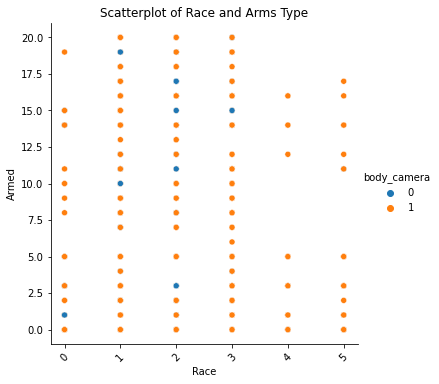

In [12]:
sns.relplot(x="race",y="armed",hue="body_camera",data=df2)
plt.ylabel('Armed')
plt.xlabel('Race')
plt.xticks(rotation=45)
plt.title('Scatterplot of Race and Arms Type')

C:\Users\kevin\Anaconda3\envs\r-tutorial\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


Text(0.5, 1.0, 'Density of Race')

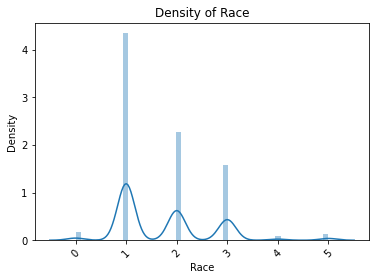

In [13]:
sns.distplot(df2["race"])
plt.ylabel('Density')
plt.xlabel('Race')
plt.xticks(rotation=45)
plt.title('Density of Race')

C:\Users\kevin\Anaconda3\envs\r-tutorial\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


Text(0.5, 1.0, 'Density of Arms Type')

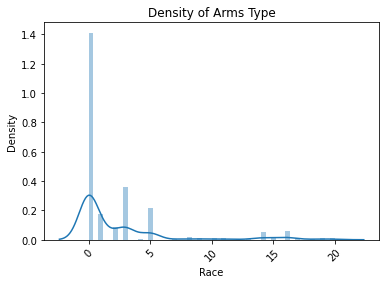

In [14]:
sns.distplot(df2["armed"])
plt.ylabel('Density')
plt.xlabel('Race')
plt.xticks(rotation=45)
plt.title('Density of Arms Type')

In [15]:
# ANOVA Hypothesis test    
from scipy.stats import f_oneway                  # For use in project
data1 = df2['body_camera']
data2 = df2['race']
#data3 = df['Rank']
stat, p = f_oneway(data1, data2)
print('stat=%.3f, p=%.3f' % (stat, p))
if p <= 0.05:
	print('Accept null hypothesis they are Probably the same distribution')
else:
	print('Reject the null hypothesis, they are Probably different distributions')

stat=3450.701, p=0.000
Accept null hypothesis they are Probably the same distribution


In [16]:
df2.keys()

Index(['id', 'name', 'date', 'manner_of_death', 'armed', 'age', 'gender',
       'race', 'city', 'state', 'signs_of_mental_illness', 'threat_level',
       'flee', 'body_camera', 'arms_category'],
      dtype='object', name=0)

In [17]:
df2.shape

(4895, 15)

In [18]:
columns="id manner_of_death armed age gender signs_of_mental_illness body_camera".split()

In [19]:
columns

['id',
 'manner_of_death',
 'armed',
 'age',
 'gender',
 'signs_of_mental_illness',
 'body_camera']

In [20]:
target = df2['race']

In [21]:
DF=pd.DataFrame(df2, columns=columns)
DF

,id,manner_of_death,armed,age,gender,signs_of_mental_illness,body_camera
1,4635,1,14,42.0,0,0,1
2,627,1,17,38.0,0,1,1
3,1004,1,17,32.0,0,1,1
4,1365,1,17,20.0,0,1,1
5,2530,1,17,57.0,0,1,1
...,...,...,...,...,...,...,...
4891,5913,0,0,28.0,0,1,1
4892,5914,0,0,26.0,0,0,1
4893,5925,0,0,23.0,0,1,1
4894,5921,0,0,22.0,0,1,1


In [22]:
y=target

In [23]:
X_train, X_test, y_train, y_test = train_test_split(DF, y, test_size=0.40)
print(X_train.shape, y_train.shape)
print(X_test.shape, y_test.shape)

(2937, 7) (2937,)
(1958, 7) (1958,)


In [26]:
lm = linear_model.LinearRegression()
model = lm.fit(X_train, y_train)
predictions = lm.predict(X_test)

In [27]:
predictions

array([1.74120528, 1.44965507, 1.73972588, ..., 1.33614869, 1.67824569,
       1.59611819])

(array([-1.,  0.,  1.,  2.,  3.,  4.,  5.,  6.]),
 [Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, '')])

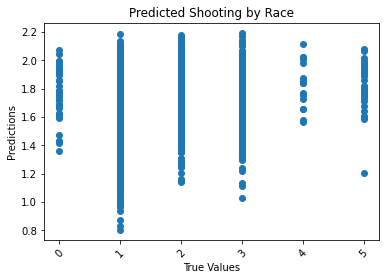

In [28]:
plt.scatter(y_test, predictions)
plt.xlabel('True Values')
plt.ylabel('Predictions')
plt.title('Predicted Shooting by Race')
plt.xticks(rotation=45)

In [29]:
print('Score:', model.score(X_test, y_test))

Score: 0.05271173032817211


In [30]:
# Linear Regression MOdel 2 

In [31]:
df3 = pd.read_csv("shootings_1.csv", sep=",", header=None, engine='python', encoding="utf-8-sig") # imports the dataset

In [32]:
header = df3.iloc[0]
# take the rest of your data minus the header row
df3 = df3[1:]
# set the header row as the df header
df3.columns = header
df3

,id,name,date,manner_of_death,armed,age,gender,race,city,state,signs_of_mental_illness,threat_level,flee,body_camera,arms_category
1,4635,Henry Lane,4/14/2019,1,14,42,0,5,Red Bluff,CA,0,other,Foot,1,Blunt instruments
2,627,Neil White,7/9/2015,1,17,38,0,1,Los Angeles,CA,1,attack,Other,1,Electrical devices
3,1004,John David Livingston,11/15/2015,1,17,32,0,1,Spring Lake,NC,1,attack,Not fleeing,1,Electrical devices
4,1365,Marco Loud,3/12/2016,1,17,20,0,2,Houston,TX,1,attack,Not fleeing,1,Electrical devices
5,2530,Selwyn Aubrey Hall,4/26/2017,1,17,57,0,2,Jacksonville,FL,1,other,Not fleeing,1,Electrical devices
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4891,5913,Gregorio Cruz Vanloo,6/11/2020,0,0,28,0,1,DeKalb County,TN,1,other,Other,1,Guns
4892,5914,Mason James Lira,6/11/2020,0,0,26,0,1,Paso Robles,CA,0,attack,Foot,1,Guns
4893,5925,Caine Van Pelt,6/12/2020,0,0,23,0,2,Crown Point,IN,1,attack,Car,1,Guns
4894,5921,William Slyter,6/13/2020,0,0,22,0,1,Kansas City,MO,1,other,Other,1,Guns


In [33]:
columns="manner_of_death armed age gender race signs_of_mental_illness body_camera".split()

In [34]:
columns

['manner_of_death',
 'armed',
 'age',
 'gender',
 'race',
 'signs_of_mental_illness',
 'body_camera']

In [35]:
df3=pd.DataFrame(df3, columns=columns)
df3

,manner_of_death,armed,age,gender,race,signs_of_mental_illness,body_camera
1,1,14,42,0,5,0,1
2,1,17,38,0,1,1,1
3,1,17,32,0,1,1,1
4,1,17,20,0,2,1,1
5,1,17,57,0,2,1,1
...,...,...,...,...,...,...,...
4891,0,0,28,0,1,1,1
4892,0,0,26,0,1,0,1
4893,0,0,23,0,2,1,1
4894,0,0,22,0,1,1,1


In [36]:
# changes all the ability variables to a numeric type from an object type. 
df3['manner_of_death'] = pd.to_numeric(df3['manner_of_death'], errors='coerce')
df3['armed'] = pd.to_numeric(df3['armed'], errors='coerce')
df3['age'] = pd.to_numeric(df3['age'], errors='coerce')
df3['gender'] = pd.to_numeric(df3['gender'], errors='coerce')
df3['race'] = pd.to_numeric(df3['race'], errors='coerce')
df3['signs_of_mental_illness'] = pd.to_numeric(df3['signs_of_mental_illness'], errors='coerce')
df3['body_camera'] = pd.to_numeric(df3['body_camera'], errors='coerce')

In [37]:
df3.dtypes

manner_of_death              int64
armed                        int64
age                        float64
gender                       int64
race                         int64
signs_of_mental_illness      int64
body_camera                  int64
dtype: object

In [38]:
X = df3.drop(columns=['race'])
lm=LinearRegression()
lm

LinearRegression()

In [40]:
lm.fit(X,df3.race)

LinearRegression()

In [41]:
print('Estimated intercept coefficient:',lm.intercept_)

Estimated intercept coefficient: 2.16547607687622


In [42]:
print("Number of coeffiients:", len(lm.coef_))

Number of coeffiients: 6


In [43]:
pd.DataFrame(zip(X.columns, lm.coef_), columns = ['features', 'estimatedCoefficients'])

,features,estimatedCoefficients
0,manner_of_death,0.008032
1,armed,0.006010
2,age,-0.014805
3,gender,-0.120562
4,signs_of_mental_illness,0.214023
5,body_camera,-0.103849


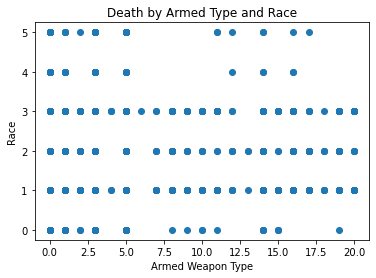

In [49]:
# True PLot
plt.scatter(df3.armed, df3.race)
plt.xlabel('Armed Weapon Type')
plt.ylabel('Race')
plt.title('Death by Armed Type and Race')
plt.show()

In [267]:
lm.predict(X)[0:5]

array([1.53200115, 1.82327146, 1.91209913, 2.08975446, 1.54198385])

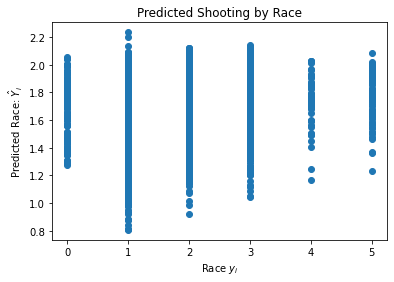

In [283]:
# Prediction PLot
plt.scatter(df3.race, lm.predict(X))
plt.xlabel('Race $y_i$')
plt.ylabel('Predicted Race: $\hat{Y}_i$')
plt.title('Predicted Shooting by Race')
plt.show()

In [269]:
mseFull = np.mean((df3.race - lm.predict(X)) ** 2)
print(mseFull)

0.8136958721659274


In [50]:
v = np.var(X)
print("variance", v)

variance manner_of_death              0.048097
armed                       18.549778
age                        161.113553
gender                       0.043296
signs_of_mental_illness      0.174557
body_camera                  0.104137
dtype: float64


In [57]:
lm = LinearRegression()
lm.fit(X[['armed']], df3.race)

LinearRegression()

In [58]:
mse2 = np.mean((df3.race - lm.predict(X[['armed']])) ** 2)
mse2

0.8624142857659872

In [59]:
X_train, X_test, Y_train, Y_test = train_test_split(
    X, df3.race, test_size=.40, random_state=5)
print(X_train.shape)
print(X_test.shape)
print(Y_train.shape)
print(Y_test.shape)

(2937, 6)
(1958, 6)
(2937,)
(1958,)


In [60]:
lm=LinearRegression()
lm.fit(X_train, Y_train)
pred_train = lm.predict(X_train)
pred_test = lm.predict(X_test)

Text(0, 0.5, 'Residuals')

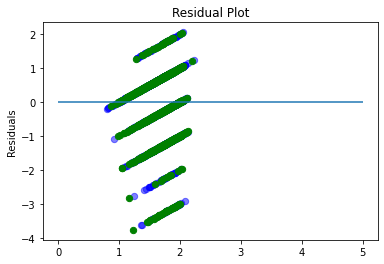

In [61]:
plt.scatter(lm.predict(X_train), lm.predict(X_train) - Y_train, c='b', s=40, alpha=0.5)
plt.scatter(lm.predict(X_test), lm.predict(X_test) - Y_test, c='g', s=40)
plt.hlines(y=0, xmin=0, xmax=5)
plt.title('Residual Plot')
plt.ylabel('Residuals')

In [21]:
# Decision Tree

In [2]:
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import classification_report, confusion_matrix
from sklearn import metrics
from sklearn.tree import export_graphviz
from IPython.display import Image  
from sklearn import tree

In [19]:
main_columns = columns
X = df2[columns] # main data
y = df2.race # Target variable

In [20]:
df2.shape

(4895, 15)

In [21]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.20, random_state=2000)

In [22]:
classifier = DecisionTreeClassifier(max_depth=3) # chooses the depth 
classifier.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=3)

In [23]:
y_pred = classifier.predict(X_test)
print("Accuracy:",metrics.accuracy_score(y_test, y_pred)) # returns the accuracy 

Accuracy: 0.5250255362614913


In [24]:
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

[[  0  15   4   0   0   0]
 [  0 453  52   0   0   0]
 [  0 187  61   0   0   0]
 [  0 143  38   0   0   0]
 [  0   8   3   0   0   0]
 [  0  13   2   0   0   0]]
              precision    recall  f1-score   support

           0       0.00      0.00      0.00        19
           1       0.55      0.90      0.68       505
           2       0.38      0.25      0.30       248
           3       0.00      0.00      0.00       181
           4       0.00      0.00      0.00        11
           5       0.00      0.00      0.00        15

    accuracy                           0.53       979
   macro avg       0.16      0.19      0.16       979
weighted avg       0.38      0.53      0.43       979



C:\Users\kevin\Anaconda3\envs\r-tutorial\lib\site-packages\sklearn\metrics\_classification.py:1221: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


[Text(1162.5, 1981.875, 'age <= 42.5\ngini = 0.64\nsamples = 3916\nvalue = [74, 1971, 1050, 721, 37, 63]'),
 Text(581.25, 1415.625, 'age <= 25.5\ngini = 0.674\nsamples = 2806\nvalue = [53, 1205, 871, 593, 30, 54]'),
 Text(290.625, 849.375, 'signs_of_mental_illness <= 0.5\ngini = 0.676\nsamples = 833\nvalue = [11, 272, 343, 180, 9, 18]'),
 Text(145.3125, 283.125, 'gini = 0.605\nsamples = 146\nvalue = [3, 82, 30, 28, 2, 1]'),
 Text(435.9375, 283.125, 'gini = 0.666\nsamples = 687\nvalue = [8, 190, 313, 152, 7, 17]'),
 Text(871.875, 849.375, 'signs_of_mental_illness <= 0.5\ngini = 0.66\nsamples = 1973\nvalue = [42, 933, 528, 413, 21, 36]'),
 Text(726.5625, 283.125, 'gini = 0.607\nsamples = 440\nvalue = [11, 248, 90, 79, 4, 8]'),
 Text(1017.1875, 283.125, 'gini = 0.67\nsamples = 1533\nvalue = [31, 685, 438, 334, 17, 28]'),
 Text(1743.75, 1415.625, 'armed <= 0.5\ngini = 0.484\nsamples = 1110\nvalue = [21, 766, 179, 128, 7, 9]'),
 Text(1453.125, 849.375, 'signs_of_mental_illness <= 0.5\ngini 

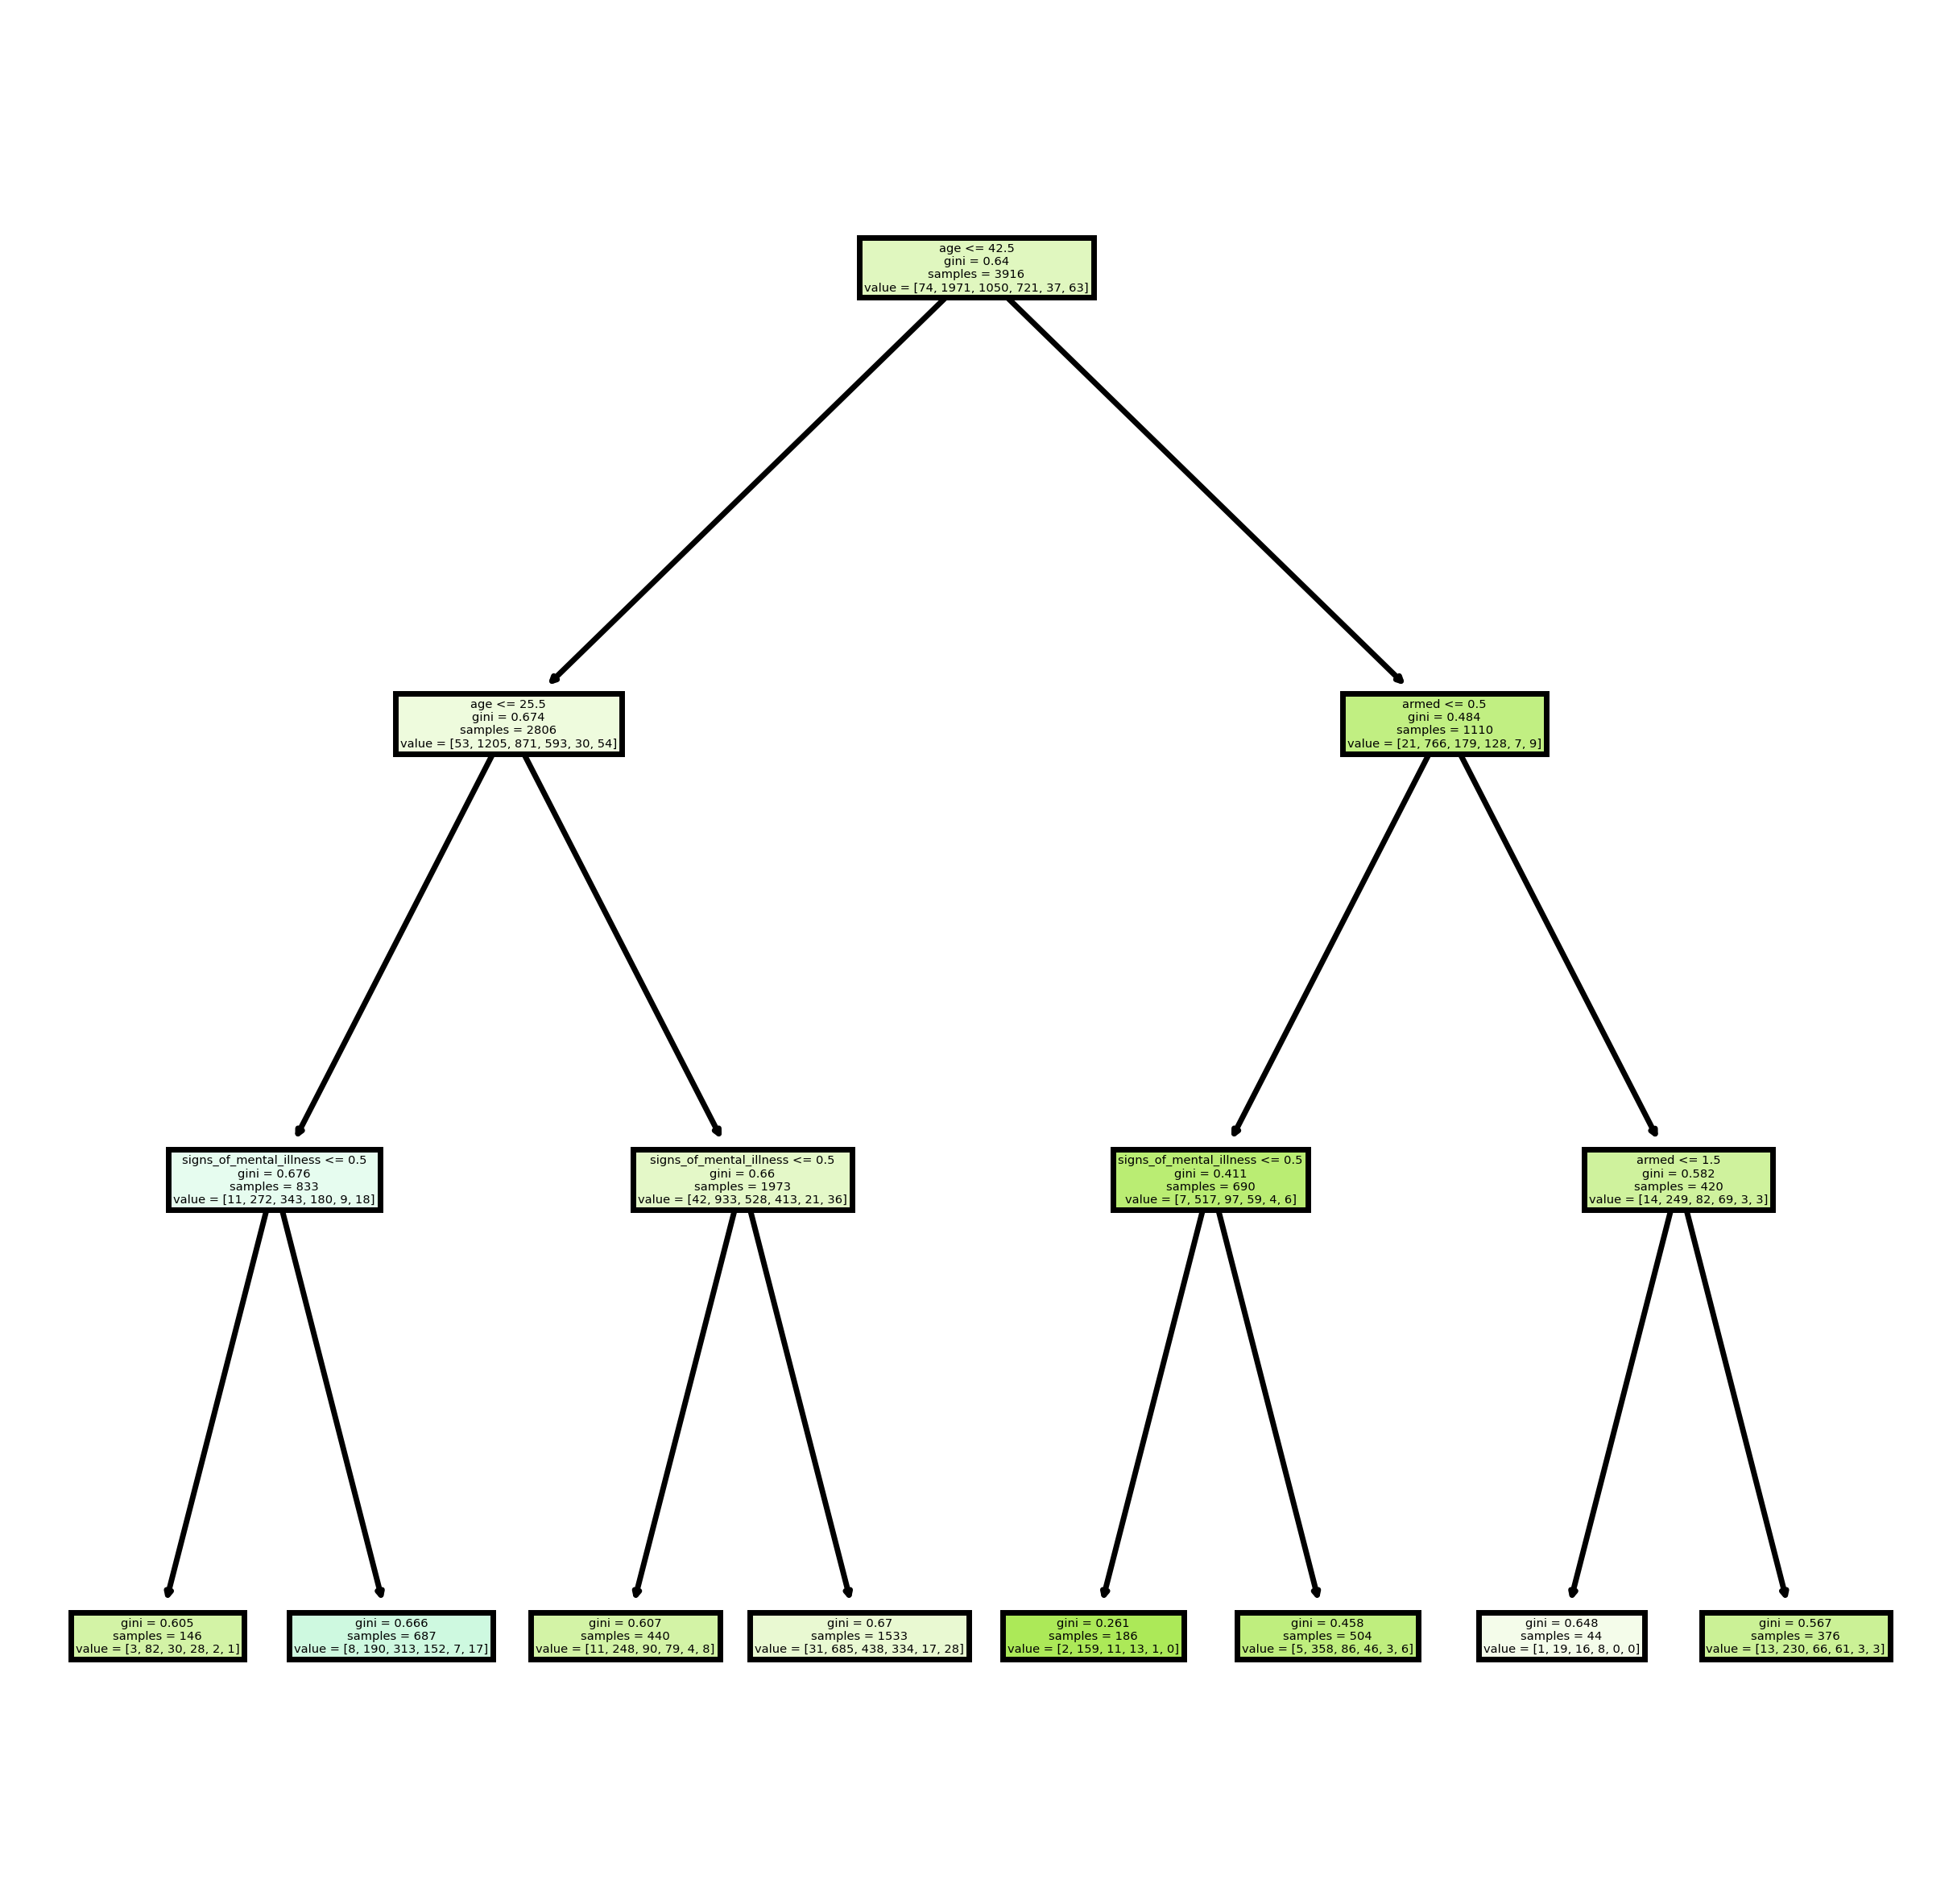

In [25]:
fig, axes = plt.subplots(nrows = 1,ncols = 1,figsize = (6,6), dpi=500)
tree.plot_tree(classifier, feature_names = main_columns, filled=True) # plots the tree 